<a href="https://colab.research.google.com/github/kilkuwu/pytorch-deep-learning/blob/main/lessons/02/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Bài tập Phân loại với PyTorch

Dưới đây là một mẫu cho các bài tập Phân loại với PyTorch.

Đây chỉ là code bắt đầu và nhiệm vụ của bạn là điền vào chỗ trống.

Vì tính linh hoạt của PyTorch, có thể có nhiều cách khác nhau để trả lời câu hỏi.

Đừng lo lắng về việc cố gắng *đúng* mà chỉ cần thử viết mã đáp ứng câu hỏi là được.

In [1]:
# Import torch

# Setup device agnostic code

# Setup random seed

## 1. Tạo một tập dữ liệu phân loại nhị phân với hàm [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) của Scikit-Learn.
  * Để đảm bảo tính nhất quán, tập dữ liệu nên có 1000 mẫu và `random_state=42`.
  * Chuyển đổi dữ liệu thành tensor PyTorch.
  * Chia dữ liệu thành tập huấn luyện và tập kiểm tra bằng `train_test_split` với 80% huấn luyện và 20% kiểm tra.

In [ ]:
# Create a dataset with Scikit-Learn's make_moons()


In [ ]:
# Turn data into a DataFrame


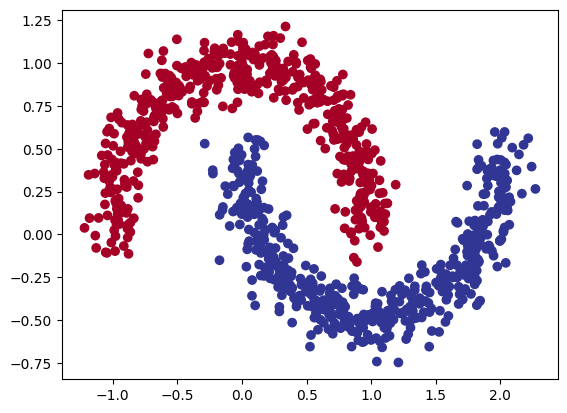

In [ ]:
# Visualize the data on a scatter plot


In [2]:
# Turn data into tensors of dtype float

# Split the data into train and test sets (80% train, 20% test)


## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
## 2. Xây dựng một mô hình bằng cách kế thừa `nn.Module` chứa các hàm kích hoạt phi tuyến tính (non-linear activation function) và thích hợp với dữ liệu bạn đã tạo ở bước 1.
  * Bạn có thể sử dụng bất kỳ kết hợp nào của các PyTorch layer (linear và non-linear) mà bạn muốn.

In [ ]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##

    def forward(self, x):
        ## Your code here ##

# Instantiate the model
## Your code here ##


## 3. Thiết lập một hàm mất mát (loss function) và bộ tối ưu hóa (optimizer) để sử dụng khi huấn luyện mô hình được xây dựng ở bước 2.

In [ ]:
# Setup loss function

# Setup optimizer to optimize model's parameters


## 4. Tạo một vòng lặp huấn luyện và kiểm tra để huấn luyện mô hình bạn đã tạo ở bước 2 với dữ liệu bạn đã tạo ở bước 1.
  * Thử forward pass của mô hình để xem đầu ra dưới dạng logits, xác suất dự đoán và nhãn.
  * Để đo lường độ chính xác của mô hình, bạn có thể tạo hàm độ chính xác của riêng mình hoặc sử dụng hàm độ chính xác trong [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Huấn luyện mô hình đủ lâu để đạt được độ chính xác trên 96%.
  * Vòng lặp huấn luyện nên output tiến trình mỗi 10 epoch cho độ mất mát và độ chính xác của mô hình trên tập huấn luyện và tập kiểm tra.

In [ ]:
# What's coming out of our model?
# logits (raw outputs of model)
print("Logits:")
## Your code here ##

# Prediction probabilities
print("Pred probs:")

## Your code here ##

# Prediction labels
print("Pred labels:")
## Your code here ##


In [4]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
# acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
# acc_fn

In [ ]:
## TODO: Uncomment this to set the seed
# torch.manual_seed(RANDOM_SEED)

# Setup epochs

# Send data to the device


# Loop through the data
for epoch in range(epochs):
  ### Training

  # 1. Forward pass (logits output)
  
  # Turn logits into prediction probabilities

  # Turn prediction probabilities into prediction labels


  # 2. Calculaute the loss

  # Calculate the accuracy

  # 3. Zero the gradients

  # 4. Loss backward (perform backpropagation)
  
  # 5. Step the optimizer (gradient descent) 

  ### Testing

  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
     
    # Turn the test logits into prediction labels
    
    # Turn logits into prediction probabilities

    # Turn prediction probabilities into prediction labels

    # 2. Caculate the test loss/acc
    

  # Print out what's happening every 100 epochs
    

## 5. Dự đoán với mô hình đã huấn luyện của bạn và vẽ chúng bằng hàm `plot_decision_boundary()` được tạo trong notebook này.

In [5]:
# Plot the model predictions
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
# Plot decision boundaries for training and test sets


## 6. Viết lại hàm kích hoạt Tanh (hyperbolic tangent) bằng PyTorch thuần.
  * Bạn có thể check reference trang web [ML cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) để biết công thức.

In [ ]:
# Create a straight line tensor


In [7]:
# Test torch.tanh() on the tensor and plot it


In [8]:
# Replicate torch.tanh() and plot it
def tanh(x):
    # Your code here
    pass

# Plot the tanh function


## 7. Tạo một tập dữ liệu đa lớp bằng cách sử dụng [hàm tạo dữ liệu spirals từ CS231n](https://cs231n.github.io/neural-networks-case-study/) (xem code bên dưới).
  * Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra) và chuyển đổi chúng thành tensor PyTorch.
  * Xây dựng một mô hình có khả năng fit với dữ liệu (bạn có thể cần kết hợp các layer tuyến tính và phi tuyến tính).
  * Xây dựng một hàm mất mát và bộ tối ưu hóa có khả năng xử lý dữ liệu đa lớp (mở rộng tùy chọn: sử dụng optimizer Adam thay vì SGD, bạn có thể cần thử nghiệm với các giá trị learning rate khác nhau để làm cho nó hoạt động).
  * Tạo một vòng lặp huấn luyện và kiểm tra cho dữ liệu đa lớp và huấn luyện mô hình để đạt được độ chính xác kiểm tra trên 95% (bạn có thể sử dụng bất kỳ hàm đo độ chính xác nào mà bạn thích) - 1000 epoch có thể là đủ.
  * Vẽ ranh giới quyết định trên tập dữ liệu spirals từ dự đoán của mô hình, hàm `plot_decision_boundary()` cũng sẽ hoạt động cho tập dữ liệu này.

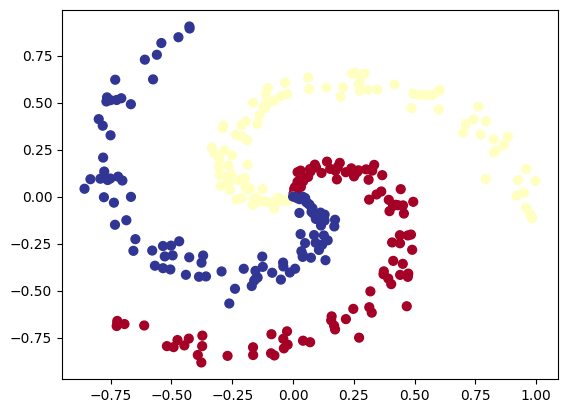

In [9]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
# Turn data into tensors

# Create train and test splits


In [10]:
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
# acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
# acc_fn

In [11]:
# Prepare device agnostic code

# Create model by subclassing nn.Module

# Instantiate model and send it to device


In [12]:
# Setup data to be device agnostic

# Print out first 10 untrained model outputs (forward pass)


In [ ]:
# Setup loss function and optimizer


In [ ]:
# Build a training loop for the model

# Loop over data
for epoch in range(epochs):

  ## Training
  
  # 1. Forward pass

  # 2. Calculate the loss
  
  # 3. Optimizer zero grad

  # 4. Loss backward

  # 5. Optimizer step

  ## Testing

  with torch.inference_mode():
    # 1. Forward pass
    
    # 2. Caculate loss and acc

    pass
    
  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    pass
  

In [13]:
# Plot decision boundaries for training and test sets
